<a href="https://colab.research.google.com/github/amalvarezme/ProcesoDigitalSen/blob/master/EEG_BCI_MI/notebook_motor_imagery_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-Class Motor Imagery Paradigm

In [ ]:
#download data
FILEID = "1gQJKCPv_qKEh0LtpVoNY-yCOg4pbXCin" 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O motor_imagery-19-01-22.h5 && rm -rf /tmp/cookies.txt

--2022-01-24 21:10:53--  https://docs.google.com/uc?export=download&confirm=Q8SK&id=1gQJKCPv_qKEh0LtpVoNY-yCOg4pbXCin
Resolving docs.google.com (docs.google.com)... 142.250.141.100, 142.250.141.102, 142.250.141.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-6o-docs.googleusercontent.com/docs/securesc/v99h061e9g5c2chuemhpp9m6s7ti1spg/neb99tn1nkt1etgh358dvhct5i8oqmr3/1643058600000/07414455255309107998/13629944174545490869Z/1gQJKCPv_qKEh0LtpVoNY-yCOg4pbXCin?e=download [following]
--2022-01-24 21:10:53--  https://doc-10-6o-docs.googleusercontent.com/docs/securesc/v99h061e9g5c2chuemhpp9m6s7ti1spg/neb99tn1nkt1etgh358dvhct5i8oqmr3/1643058600000/07414455255309107998/13629944174545490869Z/1gQJKCPv_qKEh0LtpVoNY-yCOg4pbXCin?e=download
Resolving doc-10-6o-docs.googleusercontent.com (doc-10-6o-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Conne

In [ ]:
#install necessary libraries
!pip install openbci-stream > /dev/null

In [ ]:
#import necessary libraries
from openbci_stream.utils.hdf5 import HDF5Reader
from matplotlib import pyplot as plt
from warnings import filterwarnings
import mne
filterwarnings("ignore")

# 4-Class Motor Imagery

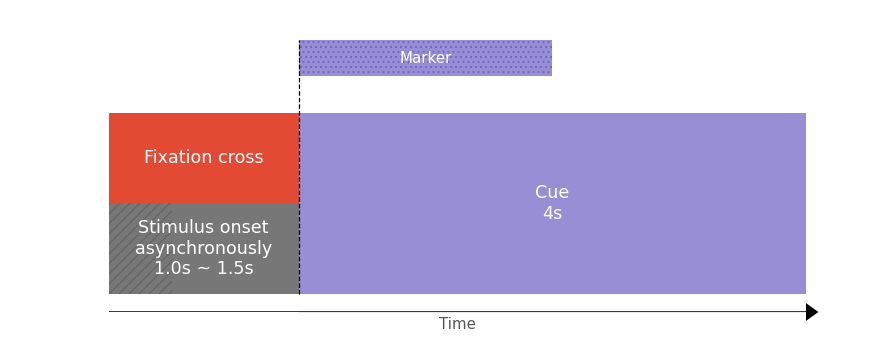

https://docs.bciframework.org/en/latest/notebooks/bci_framework/default_extensions/Class_motor_imagery_Pacman/paradigm.html

*We have the data of a subject performing a motor imagery test, with a standard 1020 setup, 1000 Hz, 16 channels and 4 classes (1,2,3,4) corresponding to (left, right, bottom, up)*

In [ ]:
with HDF5Reader('/content/motor_imagery-19-01-22.h5') as reader:
    print(reader)
    
    eeg = reader.eeg
    aux = reader.aux
    timestamp = reader.timestamp
    aux_timestamp = reader.aux_timestamp
    header = reader.header
    markers = reader.markers

/content/motor_imagery-19-01-22.h5
2022-01-19 03:37:55.867523
MARKERS: ['Right', 'Left', 'Bottom', 'Up']
SAMPLE_RATE: 1000
STREAMING_SAMPLE_RATE: 1000
DATETIME: 1642563475.867523
MONTAGE: standard_1020
CHANNELS: {1: 'Fp1', 2: 'Fp2', 3: 'F7', 4: 'F3', 5: 'Fz', 6: 'F4', 7: 'F8', 8: 'T7', 9: 'C3', 10: 'Cz', 11: 'C4', 12: 'T8', 13: 'P7', 14: 'P3', 15: 'P8', 16: 'P4'}
CHANNELS_BY_BOARD: [16]
SHAPE: [16, 1026999]


## Load data

In [ ]:
data, classes = reader.get_data(tmax=4, tmin=-0.5, markers=['Right', 'Left', 'Bottom', 'Up'])
data.shape # trials, channels, time

(160, 16, 4500)

In [ ]:
# Classes
classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4])

In [ ]:
# Class names
reader.markers.keys()

dict_keys(['Right', 'Left', 'Bottom', 'Up'])

## Standard 10-20 

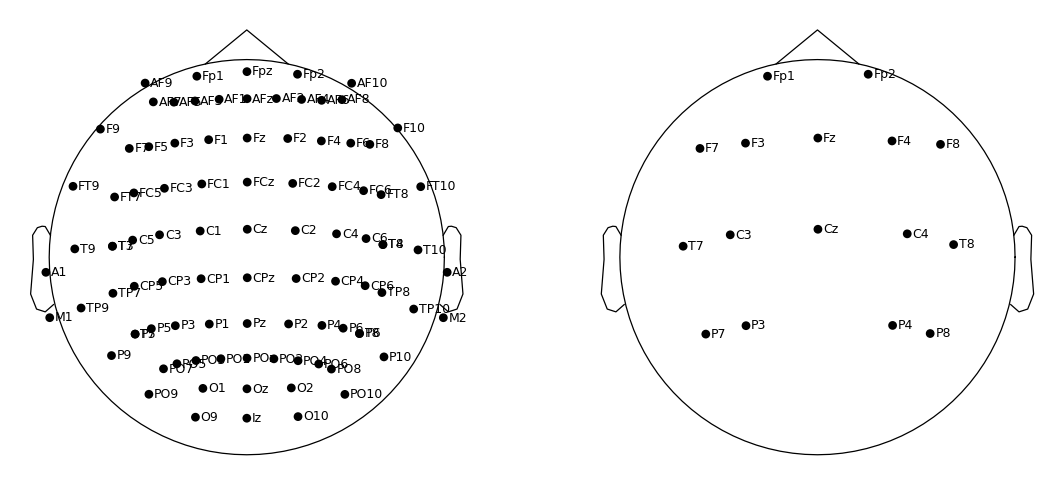

In [ ]:
plt.figure(figsize=(15, 8), dpi=90)

# Channels
channel_names=list(header['channels'].values())
fs=header['sample_rate']


# se deben ajustar los nombres de los canales al montaje 10-20 de mne
montage = mne.channels.make_standard_montage('standard_1020') #"standard_1020"
info = mne.create_info(montage.ch_names, sfreq=fs, ch_types="eeg")
info.set_montage(montage)
ax1 = plt.subplot(121)
mne.viz.plot_sensors(info, show_names=True, axes=ax1, show=False)


# canales base de datos - Se deben ajustar para las pruebas con OpenBCI
# Se crea un objeto mne con el montaje de los electrodos usados
montage = mne.channels.make_standard_montage('standard_1020')
info = mne.create_info(channel_names, sfreq=fs, ch_types="eeg")
info.set_montage(montage)
ax2 = plt.subplot(122)
mne.viz.plot_sensors(info, show_names=True,axes=ax2)

plt.show()